# Objetivo

Objetivo desse notebook é analisar a correlação entre as variáveis e definir as possíveis variáveis que serão entradas do modelo.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pandas as pd

path_manipulate_data = os.path.abspath(os.path.join("..", "0_utils"))

sys.path.append(path_manipulate_data)

from class_manipulate_data import ManipulateData

manipulate_data = ManipulateData()
path_preprocessing_output = manipulate_data.get_path_preprocessing_output()

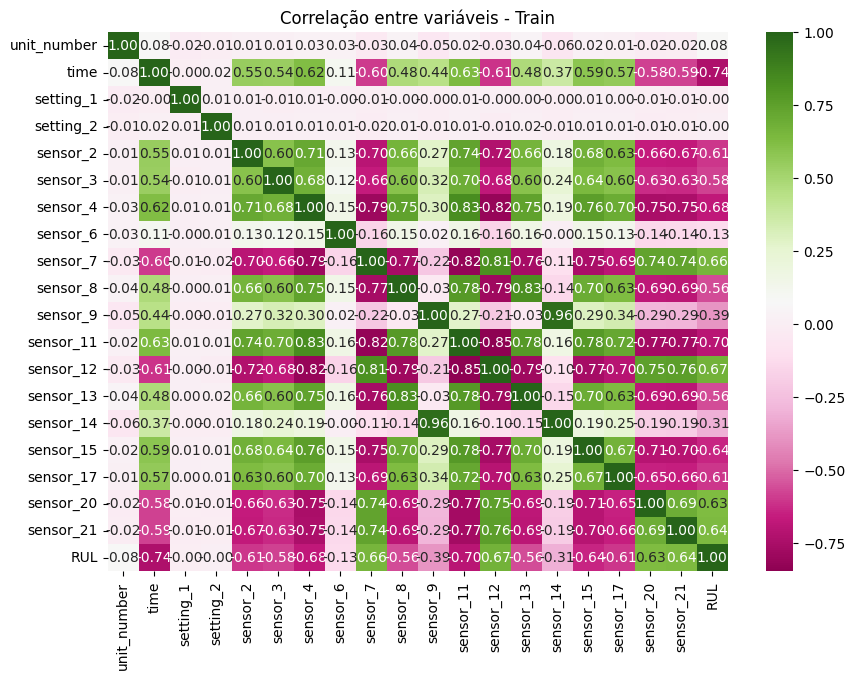

In [2]:
path_dataset_train = os.path.join(path_preprocessing_output, "train_FD001.csv")

df_train = pd.read_csv(path_dataset_train)
#df_train = df_train.drop(columns=['unit_number', 'time'])

plt.figure(figsize=(10, 7))
sns.heatmap(df_train.corr(method='pearson'),
            annot = True,
            fmt = '.2f',
            cmap='PiYG')
plt.title('Correlação entre variáveis - Train')
plt.show()

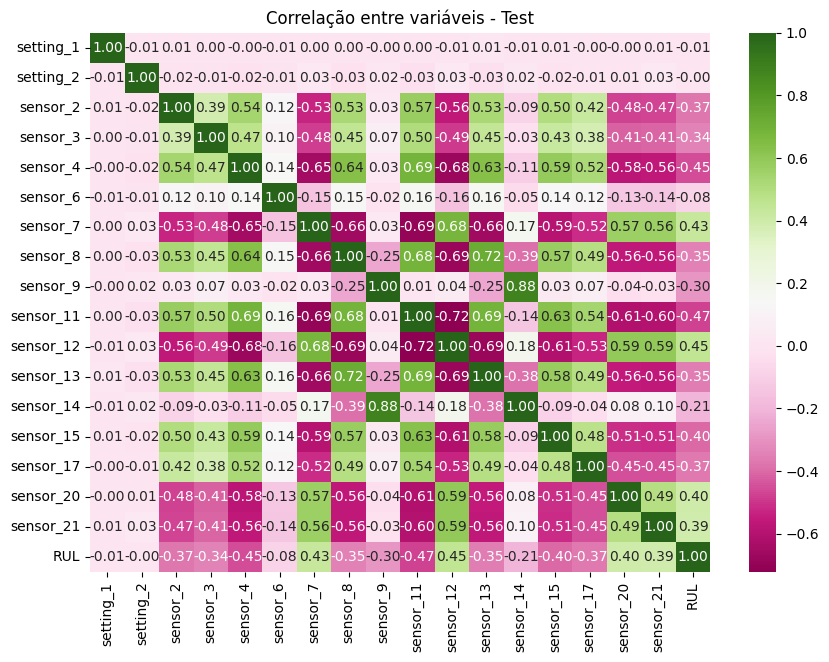

In [3]:
path_dataset_test = os.path.join(path_preprocessing_output, "test_FD001.csv")

df_test = pd.read_csv(path_dataset_test)
df_test = df_test.drop(columns=['unit_number', 'time'])

plt.figure(figsize=(10, 7))
sns.heatmap(df_test.corr(method='pearson'),
            annot = True,
            fmt = '.2f',
            cmap='PiYG')
plt.title('Correlação entre variáveis - Test')
plt.show()

# Conclusões

Pode-se observar que as variáveis `setting_1` e `setting_2` apresentam baixa correlação com a variável RUL. A variável `sensor_6` também possui esse comportamento. Além disso, existem variáveis que apresentaram correlação entre si, como: `sensor_9` e `sensor_14`.

Por esses motivos deverá ser feito uma seleção de variáveis.

In [4]:
# possíveis entradas para o modelo
model_input = ['sensor_2', 'sensor_3',
'sensor_4', 'sensor_7',
'sensor_8', 'sensor_9',
'sensor_11', 'sensor_12',
'sensor_13', 'sensor_15',
'sensor_17', 'sensor_20',
'sensor_21']

# Análise aplicando média móvel aos dados

In [5]:
df_rolling = df_train.groupby('unit_number').rolling(window=24).mean()
df_rolling = df_rolling.dropna()

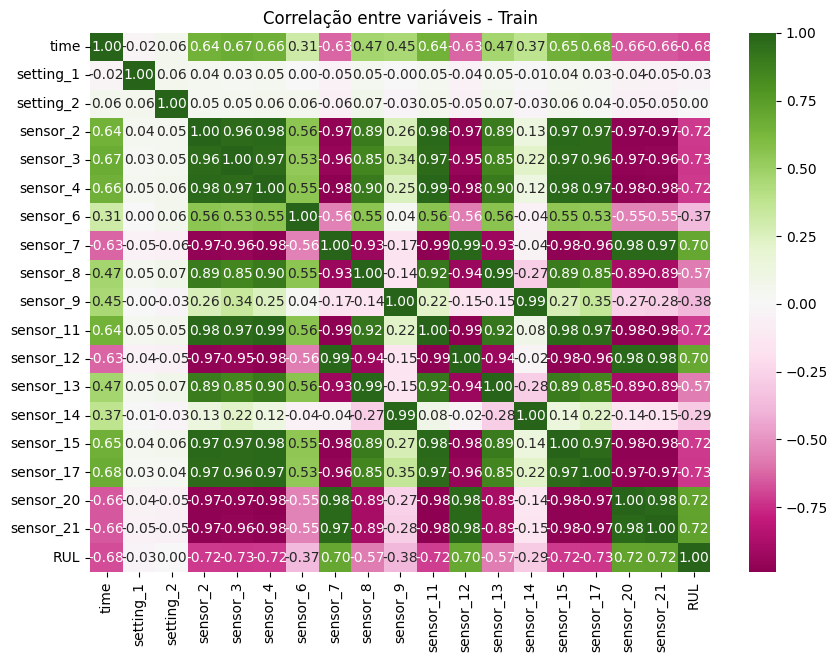

In [6]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_rolling.corr(method='pearson'),
            annot = True,
            fmt = '.2f',
            cmap='PiYG')
plt.title('Correlação entre variáveis - Train')
plt.show()